# Random Forest Regression - Cars Prices

In [1]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sys.path.insert(0, '../src')
import regression_functions_utils as rfu

In [2]:
# Cars
# http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/
f = "/Users/tarajano/stud/data_analysis_stats_ml_mix/data/autos/imports-85_ready.csv"
dtf = pd.read_csv(f)
print(dtf.shape)

(205, 26)


####  Drop NA records

In [3]:
dtf = dtf.replace({'?': np.nan}).dropna()
print(dtf.shape)

(159, 26)


####  Define numeric and Categorical columns

In [4]:
num_cols = [ 
    'symboling', 'normalized_losses', 'num_of_doors', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
    'num_of_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
    'city_mpg','highway_mpg', 'price'
]
cat_cols = [
    'make', 'fuel_type', 'aspiration', 'body_style',
    'drive_wheels', 'engine_location', 'engine_type','fuel_system'
]

In [5]:
##  Convert Categorical to Binary
#ctg_dtf = rfu.get_dummies(dtf=dtf[cat_cols], categ_cols=cat_cols, avoid_dummy_trap=True)

####  Convert Word to Number

In [6]:
from word2number import w2n

to_num = ['num_of_doors', 'num_of_cylinders']

for c in to_num:
    dtf[c] = [w2n.word_to_num(x) for x in dtf[c].values]

#### Numeric columns only dtf

In [7]:
num_dtf = dtf[num_cols]

In [9]:
print('num_dtf.shape', num_dtf.shape)

num_dtf.shape (159, 18)


#### Cast types

In [12]:
num_dtf = num_dtf.astype(
    {'normalized_losses':'float32', 'bore':'float32', 'stroke':'float32',
     'horsepower': 'int32', 'peak_rpm': 'int32','price': 'float32'}
)

In [14]:
print(num_dtf.columns)

Index(['symboling', 'normalized_losses', 'num_of_doors', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'num_of_cylinders',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')


In [18]:
X = num_dtf.drop(['price'], axis=1).copy()
y = num_dtf[['price']].copy()

#### Split into Train & Test sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Create Random Forest Regressor

In [79]:
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [80]:
regressor.score(X_train, y_train)

0.9630912126932948

In [81]:
y_hat = regressor.predict(X_train)

In [82]:
mean_squared_error(y_train, y_hat)

1107334.0649409448

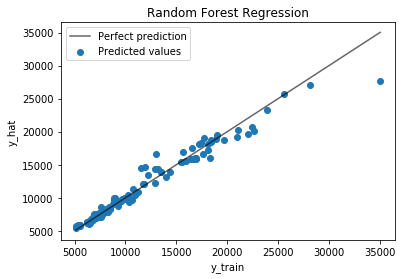

In [83]:
plt.scatter(y_train, y_hat)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', alpha=.6)
plt.legend(['Perfect prediction', 'Predicted values'])
plt.xlabel('y_train')
plt.ylabel('y_hat')
plt.title('Random Forest Regression')
plt.show()

#### On Test set

In [84]:
y_hat = regressor.predict(X_test)

In [85]:
mean_squared_error(y_test, y_hat)

4052481.4888281245

In [86]:
regressor.score(X_test, y_test)

0.9207087852736682

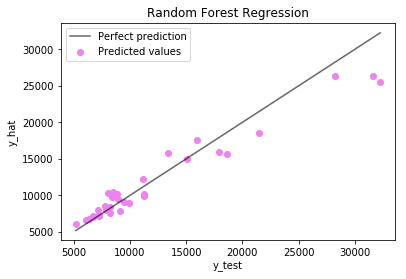

In [87]:
plt.scatter(y_test, y_hat, color='violet')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', alpha=.6)
plt.legend(['Perfect prediction', 'Predicted values'])
plt.xlabel('y_test')
plt.ylabel('y_hat')
plt.title('Random Forest Regression')
plt.show()

In [88]:
regressor.fit(X, y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [90]:
y_hat = regressor.predict(X)
mean_squared_error(y, y_hat)

1072483.085332809

In [91]:
regressor.score(X, y)

0.9687613258494464

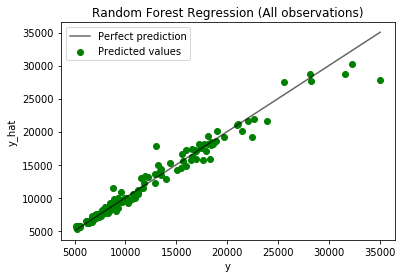

In [93]:
plt.scatter(y, y_hat, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', alpha=.6)
plt.legend(['Perfect prediction', 'Predicted values'])
plt.xlabel('y')
plt.ylabel('y_hat')
plt.title('Random Forest Regression (All observations)')
plt.show()